# Pymaceuticals Inc.
---

### Analysis

- Based on figure 5, the tumor volumes were lowest in mice treated with Capomulin and Ramicane.
- The data suggests that Ramicane and Capomulin had the most consistent results given that it has the lowest standard deviation and standard of error.
- Ramicane and Capomulin also had the highest number of mice tested, which may be the reason the data for these two treatments have the lowest standard deviation/errors.
 

In [1]:
%matplotlib widget

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combo_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combo_df[combo_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_rows)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combo_df.loc[combo_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combo_df.drop(combo_df[combo_df['Mouse ID'] == "g989"].index, inplace = True)
# shows that g989 has been removed:
# print(combo_df.loc[combo_df["Mouse ID"] == "g989"])

In [6]:
# Checking the number of mice in the clean DataFrame.
len(combo_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

by_regimen = combo_df.groupby(combo_df['Drug Regimen'])
mean = by_regimen['Tumor Volume (mm3)'].mean()
median = by_regimen['Tumor Volume (mm3)'].median()
variance = by_regimen['Tumor Volume (mm3)'].var()
std_dev = by_regimen['Tumor Volume (mm3)'].std()
std_err = by_regimen['Tumor Volume (mm3)'].sem()

summ_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std_dev,
    "Standard of Error": std_err
})
summ_stats

,Mean,Median,Variance,Standard Deviation,Standard of Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = by_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

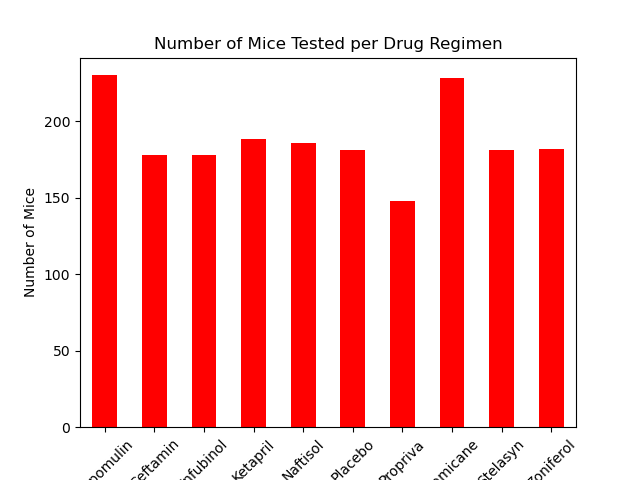

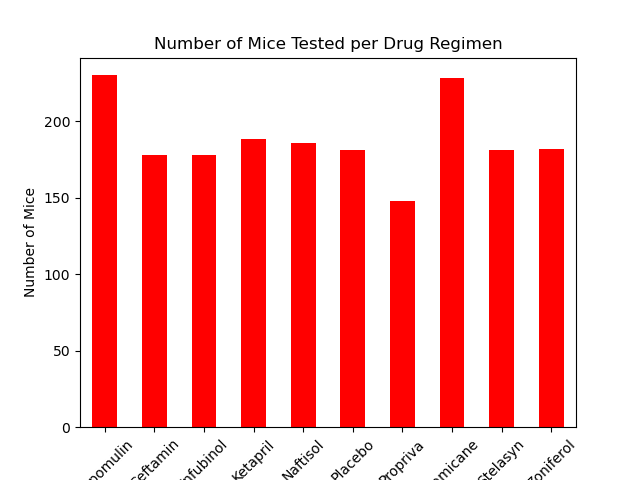

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_regimens = by_regimen["Drug Regimen"].unique()
y_mice = by_regimen["Mouse ID"].count()

fig1, ax1 = plt.subplots(1)
ax1 = y_mice.plot(kind="bar", facecolor="red",
                        title="Number of Mice Tested per Drug Regimen",
                        xlabel="Drug Regimen",
                        ylabel="Number of Mice")
ax1.set_xticklabels(x_regimens, rotation=45)
fig1.show()

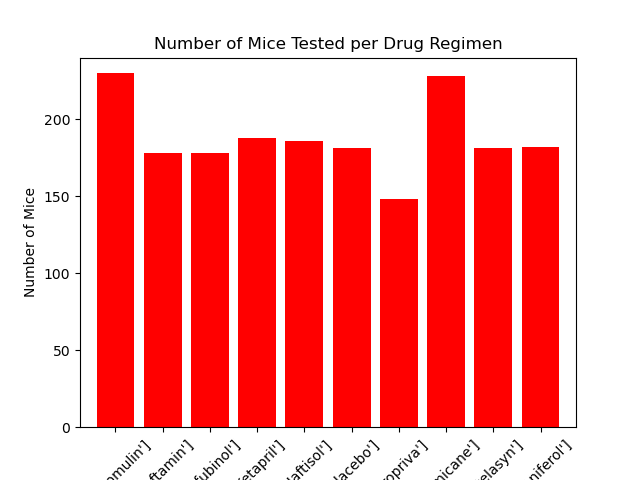

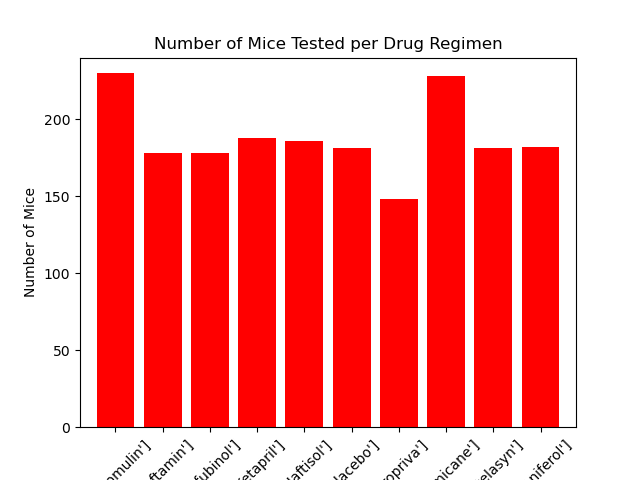

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(y_mice))

fig2, ax2 = plt.subplots(1)

ax2.bar(x_axis, y_mice, color="r", align="center")
tick_loc = [val for val in x_axis]
ax2.set_xticks(x_axis, labels=x_regimens, rotation=45)
ax2.set_xlim(-0.75, len(x_axis)-0.25)
ax2.set_ylim(0, max(y_mice)+10)
ax2.set_title("Number of Mice Tested per Drug Regimen")
ax2.set_xlabel("Drug Regimen")
ax2.set_ylabel("Number of Mice")

fig2.show()

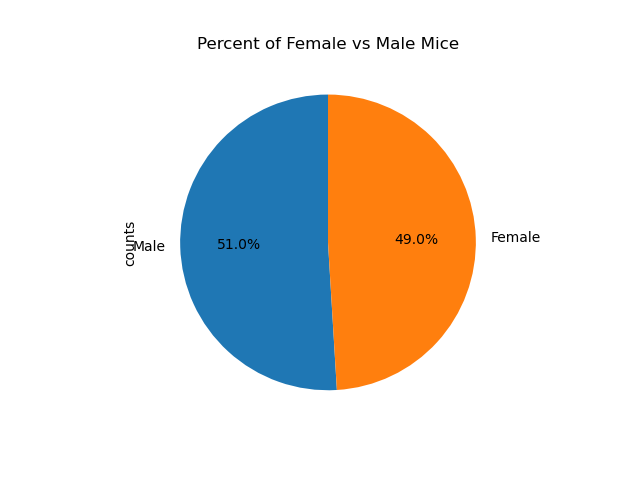

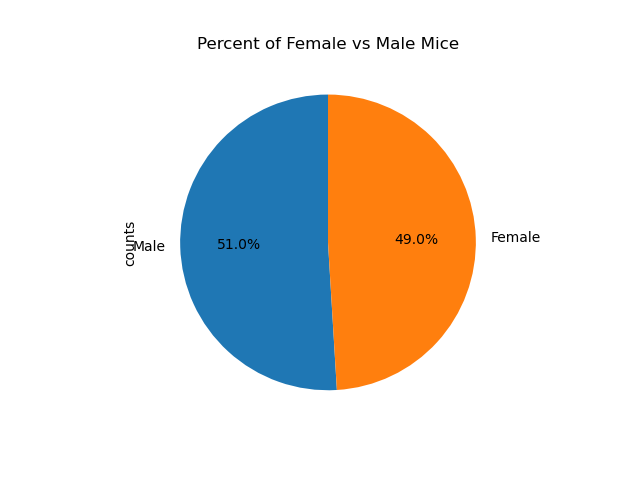

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = combo_df['Sex'].value_counts().rename_axis('Sex').to_frame(name='counts')

fig3, ax3 = plt.subplots(1)
ax3 = sex_count['counts'].plot(kind='pie', title='Percent of Female vs Male Mice', autopct='%1.1f%%', startangle=90)
fig3.show()

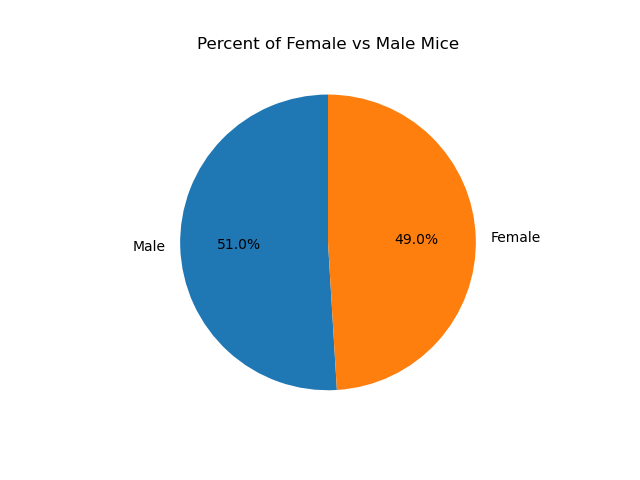

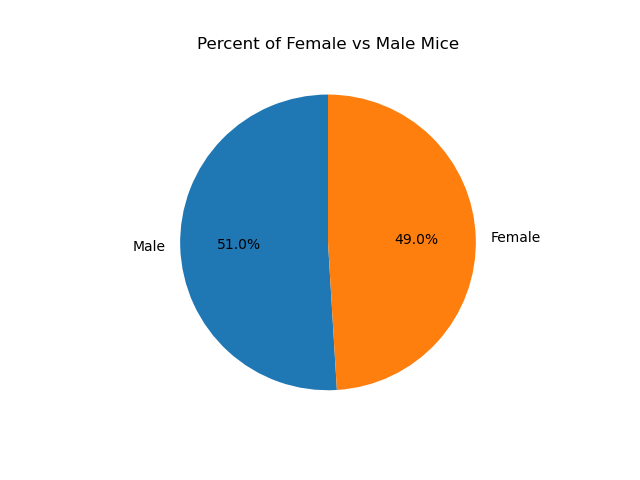

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig4, ax4 = plt.subplots(1)
ax4.pie(sex_count['counts'], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax4.set_title("Percent of Female vs Male Mice")
fig4.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times_df = combo_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
merged_df = max_times_df.merge(combo_df, on=['Mouse ID', 'Timepoint'], how='left')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
four_tx = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tvols = {
    "Capomulin": [],
    "Ramicane": [],
    "Infubinol": [],
    "Ceftamin": []
}

for reg  in four_tx:
    for row in merged_df.index:
        if merged_df.iloc[row]["Drug Regimen"] == reg:
            tvols[reg].append(merged_df.iloc[row]["Tumor Volume (mm3)"])

four_df = pd.DataFrame(tvols)
four_df


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [15]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for reg  in four_tx:
    reg_df = merged_df[merged_df["Drug Regimen"] == reg]
    
    # Determine outliers using upper and lower bounds
    quartiles = reg_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = merged_df.loc[(merged_df['Tumor Volume (mm3)'] < lower_bound) | (merged_df['Tumor Volume (mm3)'] > upper_bound)]
print(outliers)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
96      k403         45     Ramicane    Male          21          16   
174     s185         45    Capomulin  Female           3          17   

     Tumor Volume (mm3)  Metastatic Sites  
96            22.050126                 1  
174           23.343598                 1  


C:\Users\Cassia\AppData\Local\Temp\ipykernel_14580\3982495086.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(four_tx)


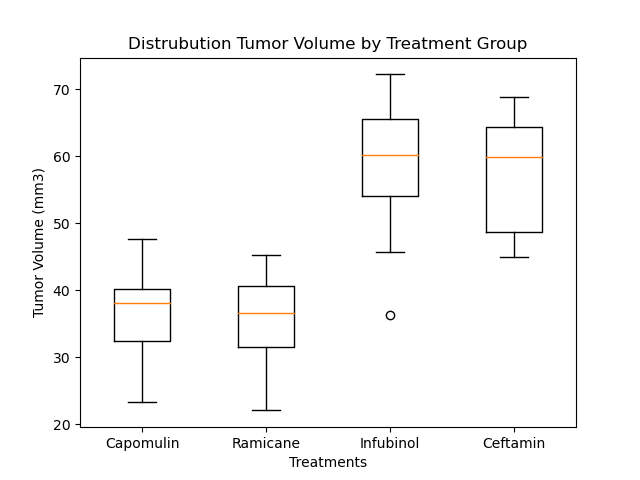

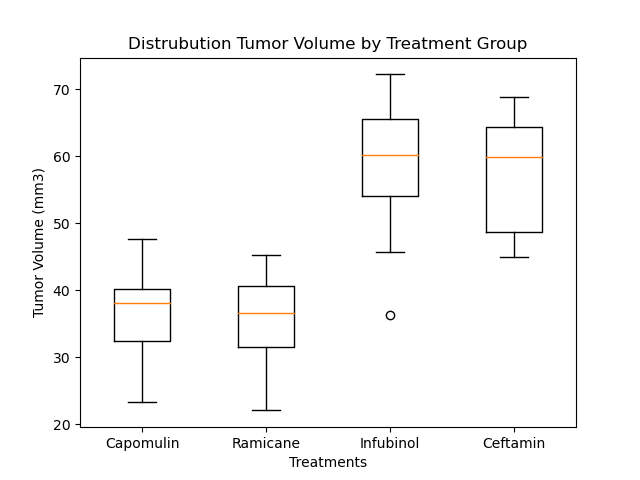

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig5, ax5 = plt.subplots()
ax5.set_title('Distrubution Tumor Volume by Treatment Group')
ax5.set_ylabel('Tumor Volume (mm3)')
ax5.set_xlabel('Treatments')
ax5.set_xticklabels(four_tx)
ax5.boxplot(four_df)
fig5.show()

## Line and Scatter Plots

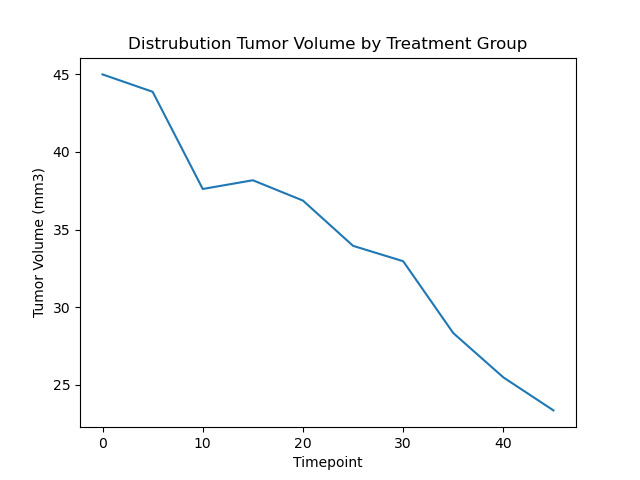

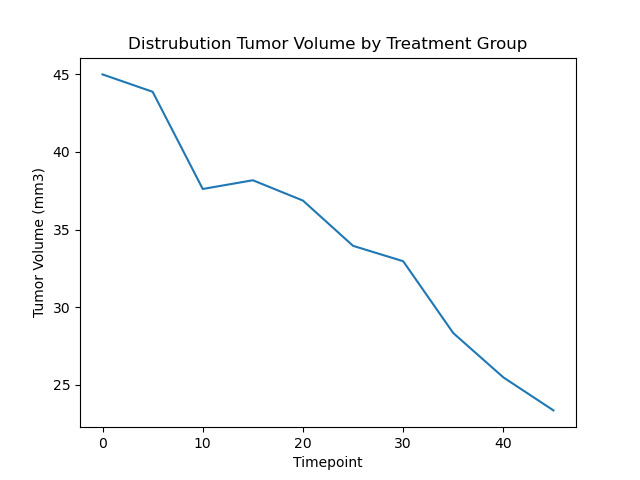

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = combo_df[combo_df['Drug Regimen'] == 'Capomulin']
mouse_df = cap_df.loc[cap_df['Mouse ID'] == 's185']

fig6, ax6 = plt.subplots()
ax6.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
ax6.set_title('Distrubution Tumor Volume by Treatment Group')
ax6.set_ylabel('Tumor Volume (mm3)')
ax6.set_xlabel('Timepoint')
fig6.show()

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
